# Data Exploration
In this notebook, we play with the datasets we collected from online resources and perform preliminary analyses on them. This report comprisis the following sections:
* [1. Bourret2012](#1.-Bourret2012)
    * [1.1 Load Dataset](#1.1-Load-Dataset)
    * [1.2 Data Preprocessing](#1.2-Data-Preprocessing)
        * [1.2.1 Handle Nulls](#1.2.1-Handle-Nulls)
        * [1.2.2 Label Encoding](#1.2.2-Label-Encoding)
        * [1.2.3 Up-sampling](#1.2.3-Up-sampling)
        * [1.2.4 Decomposition](#1.2.4-Decomposition)
        * [1.2.5 Prepare Train and Test Set](#1.2.5-Prepare-Train-and-Test-Set)
    * [1.3 Model Fitting](#1.3-Model-Fitting)
        * [1.3.1 Dummy Model Performances](#1.3.1-Dummy-Model-Performances)
        * [1.3.2 Finetune the Top Models](#1.3.2-Finetune-the-Top-Models)
        * [1.3.3 Performance Report](#1.3.3-Performance-Report)
* [2. Milano2013](#2.-Milano2013)
    * [2.1 Load Dataset](#2.1-Load-Dataset)
    * [2.2 Data Preprocessing](#2.2-Data-Preprocessing)
        * [2.2.1 Handle Nulls](#2.2.1-Handle-Nulls)
        * [2.2.2 Label Encoding](#2.2.2-Label-Encoding)
        * [2.2.3 Up-sampling](#2.2.3-Up-sampling)
        * [2.2.4 Decomposition](#2.2.4-Decomposition)
        * [2.2.5 Prepare Train and Test Set](#2.2.5-Prepare-Train-and-Test-Set)
    * [2.3 Model Fitting](#2.3-Model-Fitting)
        * [2.3.1 Dummy Model Performances](#2.3.1-Dummy-Model-Performances)
        * [2.3.2 Finetune the Top Models](#2.3.2-Finetune-the-Top-Models)
        * [2.3.3 Performance Report](#2.3.3-Performance-Report)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD 
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

# 1. Bourret2012
Wild Atlantic salmon (Salmo Salar) from Europe and North America dataset in Bourret et al.

## 1.1 Load Dataset

In [2]:
bourret_df = pd.read_csv("bourret2012/Genotypes_Dryad_without_Foyle_river.txt", header=0, index_col=None, sep="\t")
bourret_df

,Pop_ID,Sample_ID,GCR_cBin24032_Ctg1_76,GCR_cBin13749_Ctg1_18,ESTNV_28684_665,GCR_cBin32777_Ctg1_66,GCR_cBin13749_Ctg1_171,GCR_cBin22083_Ctg1_38,GCR_cBin7800_Ctg1_739,ESTV_16768_432,...,ESTNV_32436_2335,ESTNV_36393_807,ESTV_18069_370,GCR_cBin8786_Ctg1_262,ESTNV_36510_747,ESTNV_37554_1370,ESTNV_33773_1438,ESTNV_20585_61,ESTNV_24373_965,ESTV_21166_231
0,Tuloma,01_RUS_TUL_01,A/T,A/A,A/A,C/C,A/A,A/C,A/A,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
1,Tuloma,01_RUS_TUL_02,-/-,A/C,-/-,G/G,A/A,A/A,A/T,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
2,Tuloma,01_RUS_TUL_03,T/T,A/C,A/A,C/G,A/A,A/A,T/T,A/T,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
3,Tuloma,01_RUS_TUL_04,T/T,A/A,A/A,C/C,A/G,C/C,A/T,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
4,Tuloma,01_RUS_TUL_05,A/T,A/A,A/A,C/C,A/A,A/A,A/T,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,Narraguagus,40_USA_NAR_21,T/T,A/A,A/A,C/C,G/G,A/A,T/T,A/A,...,G/G,G/G,A/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
1291,Narraguagus,40_USA_NAR_22,A/T,A/A,A/A,C/C,G/G,A/A,A/A,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
1292,Narraguagus,40_USA_NAR_23,A/T,A/C,A/A,-/-,G/G,A/A,T/T,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
1293,Narraguagus,40_USA_NAR_24,T/T,-/-,A/A,C/C,G/G,A/A,T/T,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/T,A/T,G/G,G/G


### 1.2.1 Handle Nulls
Nulls are denoted by "-/-", we would like to examine the portion of nulls to decide if we are going to keep them as a feature or drop them.

In [3]:
bourret_df.replace({"-/-":None}).dropna()

,Pop_ID,Sample_ID,GCR_cBin24032_Ctg1_76,GCR_cBin13749_Ctg1_18,ESTNV_28684_665,GCR_cBin32777_Ctg1_66,GCR_cBin13749_Ctg1_171,GCR_cBin22083_Ctg1_38,GCR_cBin7800_Ctg1_739,ESTV_16768_432,...,ESTNV_32436_2335,ESTNV_36393_807,ESTV_18069_370,GCR_cBin8786_Ctg1_262,ESTNV_36510_747,ESTNV_37554_1370,ESTNV_33773_1438,ESTNV_20585_61,ESTNV_24373_965,ESTV_21166_231
99,Emtsa,03_RUS_EMT_31,A/T,A/A,A/G,C/C,A/A,A/A,T/T,A/T,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
107,Emtsa,03_RUS_EMT_39,A/T,A/C,A/A,C/C,A/A,A/C,A/T,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
454,Blackwater,12_IRE_BLW_40,A/T,A/C,A/G,C/C,A/G,C/C,A/A,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
543,NorthEsk,16_SCO_NES_09,T/T,C/C,A/A,C/C,A/A,A/C,A/A,A/T,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
545,NorthEsk,16_SCO_NES_11,T/T,A/C,A/A,C/C,A/G,A/A,T/T,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
646,Loire,18_FRA_LOI_35,T/T,A/C,A/A,C/C,A/G,A/C,A/T,A/A,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G
806,Torniojoki,24_BAL_TOR_12,T/T,A/C,A/A,C/G,A/A,C/C,A/A,A/T,...,G/G,G/G,G/G,A/A,G/G,G/G,A/A,A/A,G/G,G/G


**Observation:** We see that if we drop any rows with null feature, it would give us only 7 rows of data. Hence we will do nothing with the nulls and treat null as a feature.

### 1.2.2 Label Encoding
There are two main classes of the fish: `landlock` and `anadormous`. They can be classified with the `Pop_ID` feature, where the class will be `landlock` if the `Pop_ID` is one of the `RUS_PIS_LL`, `RUS_SYS_LL`, `RUS_PYA_LL`, `NOR_NAM_LL`, `NOR_BYG_LL`, or `BristolCove`. And `anadormous` otherwise.

In [4]:
pd.unique(bourret_df.dtypes)

array([dtype('O')], dtype=object)

**Observation:** We see that all columns in the original dataset are in string tyle. Hence we want to encode them as numerics in order to feed to our models.

In [5]:
# Encode fish groups
landlock_group = ['RUS_PIS_LL', 'RUS_SYS_LL', 'RUS_PYA_LL', 'NOR_NAM_LL', 'NOR_BYG_LL', 'BristolCove']
encoded_df = bourret_df.copy()
encoded_df["Class"] = encoded_df["Pop_ID"].isin(landlock_group)*1
encoded_df.drop(columns=["Pop_ID"], inplace=True)
encoded_df[["Class"]].value_counts()

Class
0        1063
1         232
dtype: int64

### 1.2.3 Up-sampling
We see that the number of `1` samples are way less than the `0`s, to mitigate overfitting issue, we need to upsample the data. 

In [6]:
landlock_df =  encoded_df[encoded_df["Class"] == 1]
anadormous_df = encoded_df[encoded_df["Class"] == 0]
landlock_df = resample(landlock_df, replace=True, n_samples=anadormous_df.shape[0], random_state=42)
upsampled_df = pd.concat([landlock_df, anadormous_df])
upsampled_df[["Class"]].value_counts()

Class
0        1063
1        1063
dtype: int64

In [7]:
# Encode features with one hot
X = upsampled_df.iloc[:,:-1]
y = upsampled_df["Class"]
X = OneHotEncoder().fit_transform(X)
X.shape

(2126, 24392)

### 1.2.4 Decomposition
We see that there are about 24k features. A decomposition might be neccessary.

In [8]:
X_decomp = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.toarray())
X_decomp.shape

(2126, 2)

### 1.2.5 Prepare Train and Test Set
In this section, we split the data using 80% as training set and 20% as testing set.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_decomp, y, test_size=0.2, random_state=42)

## 1.3 Model Fitting
In this section, we train and evalueate variable classification models and attempt to get the best performances.

### 1.3.1 Dummy Model Performances
First, we play with a pool of candidate classification models with their default settings, using KFold to evaluate each of them.

In [10]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel="linear"),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(),
    "KMeans": KMeans()
}

# Cross validation
kf = KFold(n_splits=10)
precisions = {
    model_name:[] for model_name in models
}
for train_index, test_index in kf.split(X_decomp):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    for model_name in models:
        model = models[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precisions[model_name].append(precision_score(y_test, y_pred, average="macro"))

In [11]:
precisions

{'Logistic Regression': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5],
 'SVM': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5],
 'Random Forest': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5],
 'Neural Network': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5],
 'KMeans': [0.16666666666666666,
  0.16666666666666666,
  0.2,
  0.16666666666666666,
  0.14285714285714285,
  0.0,
  0.0,
  1.0,
  0.5,
  0.5]}

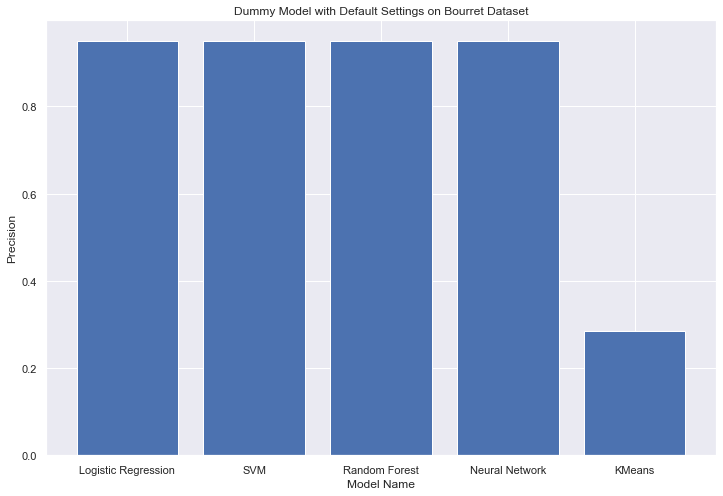

In [12]:
# Compute averate accuracies and make plot\
avg_precisions = [sum(precisions[model_name]) / len(precisions[model_name]) for model_name in models]
plt.figure(figsize=(12, 8))
plt.bar([name for name in models], avg_precisions)
plt.title("Dummy Model with Default Settings on Bourret Dataset")
plt.xlabel("Model Name")
plt.ylabel("Precision")
plt.show()

### 1.3.2 Finetune the Top Models

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_decomp, y, test_size=0.2, random_state=42)

In [14]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ["l1", 'l2']}
grid_LR = GridSearchCV(LogisticRegression(),param_grid,refit=True)
grid_LR.fit(X_train,y_train)
grid_LR.best_estimator_

LogisticRegression(solver='newton-cg')

In [15]:
param_grid = {'gamma': [1,0.1],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_SVM = GridSearchCV(SVC(),param_grid,refit=True)
grid_SVM.fit(X_train,y_train)
grid_SVM.best_estimator_

SVC(gamma=1)

In [16]:
param_grid_RF = {'bootstrap': [True, False],
                 'max_depth': [5, 10],
                 'n_estimators': [200, 400]}
grid_RF = GridSearchCV(RandomForestClassifier(),param_grid_RF,refit=True)
grid_RF.fit(X_train,y_train)
grid_RF.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200)

In [17]:
param_grid_NN = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}
grid_NN = GridSearchCV(MLPClassifier(),param_grid_NN,refit=True)
grid_NN.fit(X_train,y_train)
grid_NN.best_estimator_

MLPClassifier(activation='tanh')

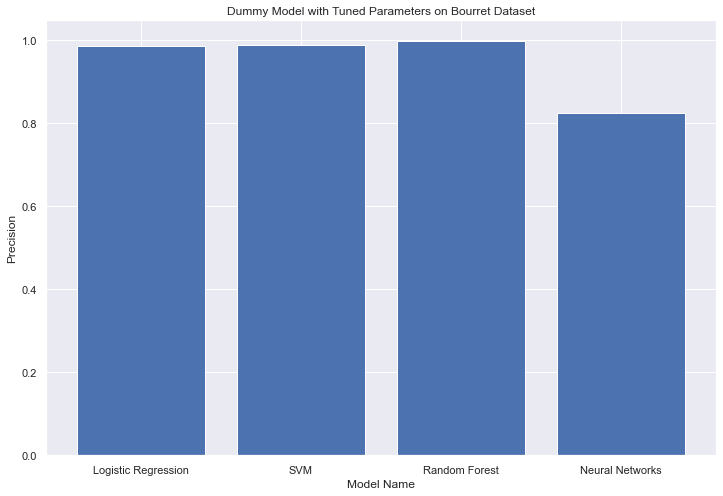

In [18]:
best_estimators = {
    "Logistic Regression": grid_LR.best_estimator_,
    "SVM": grid_SVM.best_estimator_,
    "Random Forest": grid_RF.best_estimator_,
    "Neural Networks": grid_NN.best_estimator_
}
new_precisions = []
for name in best_estimators:
    estimator = best_estimators[name]
    y_pred = estimator.predict(X_test)
    new_precisions.append(precision_score(y_test, y_pred, average="macro"))
    
plt.figure(figsize=(12, 8))
plt.bar([name for name in best_estimators], new_precisions)
plt.title("Dummy Model with Tuned Parameters on Bourret Dataset")
plt.xlabel("Model Name")
plt.ylabel("Precision")
plt.show()

### 1.3.3 Performance Report
The tuned Random Forest has the best performance.

# 2. Milano2013
Wild Atlantic salmon (Salmo Salar) from Europe and North America dataset in Milano et al.

## 2.1 Load Dataset

In [19]:
def get_dataset():
    pop_order = """1) NTH_SEA
    2) SCOTLAND
    3) IRELAND
    4) BBISCAY
    5) PORTUGAL
    6) ALGERIA
    7) MALAGA
    8) GULFLION
    9) NTH_THYR
    10) SARDINIA
    11) STH_THYR
    12) ADV_BANK
    13) MALT_BANK
    14) NTH_ADR
    15) STH_ADR
    16) NW_JON
    17) AEGEAN
    18) TURKEY
    19) CYPRUS"""

    pop_order = pop_order.split("\n")
    pop_order_list = list(map(lambda x:x.split(" ")[1], pop_order))
    Atlantic = ["NTH_SEA", "SCOTLAND", "IRELAND", "BBISCAY", "PORTUGAL"]
    
    genepop_SNP_set = "milano2013/Milano et al_Merluccius merluccius SNP data.txt"
    with open(genepop_SNP_set, "r") as IN:
        txt = IN.readlines()
    SNP_name = list(map(lambda x: x.rstrip(), txt[1:382]))
    pop_cnt = 0
    line_list = []
    for i in txt[382:]:
        if i.rstrip() == "pop":
            pop_cnt += 1
            continue

        cur_pop = pop_order_list[pop_cnt-1]

        class_label = 0
        if cur_pop in Atlantic:
            class_label = 1

        line = i.rstrip().split(r" ")
        line.insert(1, class_label)
        line[0] = line[0].replace(",", "")
        line_list.append(pd.Series(line))
    table = pd.concat(line_list, axis=1).T
    col_name = ["Sample_ID", "Class"]
    col_name.extend(SNP_name)
    col_name_dict = dict(zip(list(table.index), col_name))
    return table.rename(col_name_dict, axis=1)
milano_df = get_dataset()
milano_df

,Sample_ID,Class,1413_fpt,551_fpt,4228ms,3178_fpt,1270_fpt,3216ms,1794_fpt,1503_fpt,...,515_fpt,1631ms,1857_fpt,2579_fpt,1054_fpt,2902ms,1148ms,4449ms,1230ms,2985ms
0,MM6493,1,0101,0101,0202,0102,0101,0202,0102,0202,...,0101,0102,0102,0101,0102,0101,0202,0102,0202,0102
1,MM6494,1,0102,0101,0101,0102,0101,0102,0101,0202,...,0102,0202,0202,0101,0102,0101,0202,0102,0102,0202
2,MM6495,1,0102,0101,0101,0102,0101,0202,0102,0202,...,0102,0102,0202,0101,0202,0101,0202,0101,0102,0202
3,MM6496,1,0102,0101,0102,0102,0101,0101,0101,0202,...,0101,0202,0102,0102,0202,0101,0202,0101,0202,0202
4,MM6497,1,0102,0101,0101,0102,0101,0102,0101,0101,...,0102,0202,0102,0101,0102,0101,0202,0102,0202,0102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,MM5084,0,0102,0101,0102,0202,0101,0202,0101,0202,...,0101,0202,0202,0202,0202,0101,0202,0101,0202,0202
846,MM5085,0,0202,0101,0202,0202,0101,0202,0101,0102,...,0101,0102,0101,0102,0202,0101,0102,0101,0202,0202
847,MM5086,0,0202,0101,0101,0202,0101,0202,0102,0202,...,0102,0102,0202,0202,0102,0101,0202,0101,0202,0101
848,MM5087,0,0101,0102,0102,0202,0101,0202,0101,0202,...,0101,0101,0102,0102,0102,0101,0202,0202,0202,0102


### 2.2.1 Handle Nulls
Nulls are denoted by "-/-", we would like to examine the portion of nulls to decide if we are going to keep them as a feature or drop them.

In [20]:
milano_df.dropna()

,Sample_ID,Class,1413_fpt,551_fpt,4228ms,3178_fpt,1270_fpt,3216ms,1794_fpt,1503_fpt,...,515_fpt,1631ms,1857_fpt,2579_fpt,1054_fpt,2902ms,1148ms,4449ms,1230ms,2985ms
0,MM6493,1,0101,0101,0202,0102,0101,0202,0102,0202,...,0101,0102,0102,0101,0102,0101,0202,0102,0202,0102
1,MM6494,1,0102,0101,0101,0102,0101,0102,0101,0202,...,0102,0202,0202,0101,0102,0101,0202,0102,0102,0202
2,MM6495,1,0102,0101,0101,0102,0101,0202,0102,0202,...,0102,0102,0202,0101,0202,0101,0202,0101,0102,0202
3,MM6496,1,0102,0101,0102,0102,0101,0101,0101,0202,...,0101,0202,0102,0102,0202,0101,0202,0101,0202,0202
4,MM6497,1,0102,0101,0101,0102,0101,0102,0101,0101,...,0102,0202,0102,0101,0102,0101,0202,0102,0202,0102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,MM5084,0,0102,0101,0102,0202,0101,0202,0101,0202,...,0101,0202,0202,0202,0202,0101,0202,0101,0202,0202
846,MM5085,0,0202,0101,0202,0202,0101,0202,0101,0102,...,0101,0102,0101,0102,0202,0101,0102,0101,0202,0202
847,MM5086,0,0202,0101,0101,0202,0101,0202,0102,0202,...,0102,0102,0202,0202,0102,0101,0202,0101,0202,0101
848,MM5087,0,0101,0102,0102,0202,0101,0202,0101,0202,...,0101,0101,0102,0102,0102,0101,0202,0202,0202,0102


**Observation:** We see that the dataset does not contain null values.

### 2.2.2 Label Encoding

In [21]:
encoded_df = milano_df.copy()
encoded_df[["Class"]].value_counts()

Class
0        807
1         43
dtype: int64

### 2.2.3 Up-sampling
We see that the number of `1` samples are way less than the `0`s, to mitigate overfitting issue, we need to upsample the data. 

In [22]:
atlantic_df =  encoded_df[encoded_df["Class"] == 1]
other_df = encoded_df[encoded_df["Class"] == 0]
atlantic_df = resample(atlantic_df, replace=True, n_samples=other_df.shape[0], random_state=42)
upsampled_df = pd.concat([atlantic_df, other_df])
upsampled_df[["Class"]].value_counts()

Class
0        807
1        807
dtype: int64

In [23]:
# Encode features with one hot
X = upsampled_df.iloc[:,:-1]
y = upsampled_df["Class"].astype('int')
X = OneHotEncoder().fit_transform(X)
X.shape

(1614, 2293)

### 2.2.4 Decomposition
We see that there are about 24k features. A decomposition might be neccessary.

In [24]:
X_decomp = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.toarray())
X_decomp.shape

(1614, 2)

### 2.2.5 Prepare Train and Test Set
In this section, we split the data using 80% as training set and 20% as testing set.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_decomp, y, test_size=0.2, random_state=42)

## 2.3 Model Fitting
In this section, we train and evalueate variable classification models and attempt to get the best performances.

### 2.3.1 Dummy Model Performances
First, we play with a pool of candidate classification models with their default settings, using KFold to evaluate each of them.

In [26]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel="linear"),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(),
    "KMeans": KMeans()
}

# Cross validation
kf = KFold(n_splits=10)
precisions = {
    model_name:[] for model_name in models
}
for train_index, test_index in kf.split(X_decomp):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    for model_name in models:
        model = models[model_name]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precisions[model_name].append(precision_score(y_test, y_pred, average="macro"))

In [27]:
precisions

{'Logistic Regression': [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0],
 'SVM': [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0],
 'Random Forest': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'Neural Network': [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0],
 'KMeans': [0.14285714285714285,
  0.0,
  0.14285714285714285,
  0.125,
  0.14285714285714285,
  0.2,
  0.0,
  0.5,
  1.0,
  0.0]}

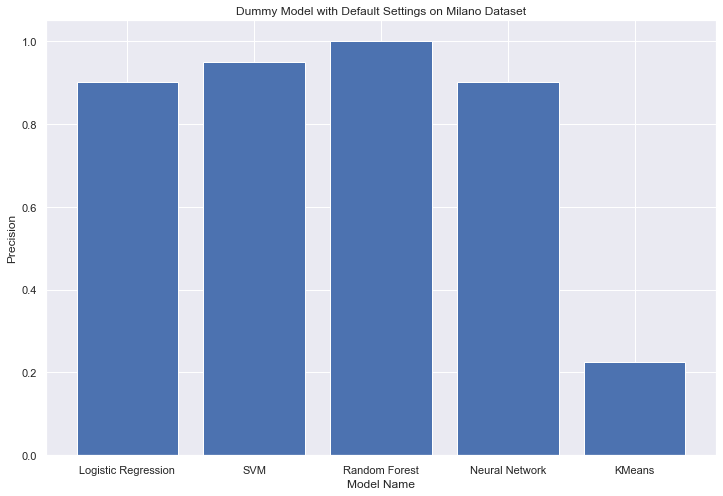

In [28]:
# Compute averate accuracies and make plot\
avg_precisions = [sum(precisions[model_name]) / len(precisions[model_name]) for model_name in models]
plt.figure(figsize=(12, 8))
plt.bar([name for name in models], avg_precisions)
plt.title("Dummy Model with Default Settings on Milano Dataset")
plt.xlabel("Model Name")
plt.ylabel("Precision")
plt.show()

### 2.3.2 Finetune the Top Models

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_decomp, y, test_size=0.2, random_state=42)

In [30]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ["l1", 'l2']}
grid_LR = GridSearchCV(LogisticRegression(),param_grid,refit=True)
grid_LR.fit(X_train,y_train)
grid_LR.best_estimator_

LogisticRegression(solver='newton-cg')

In [31]:
param_grid = {'gamma': [1,0.1],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_SVM = GridSearchCV(SVC(),param_grid,refit=True)
grid_SVM.fit(X_train,y_train)
grid_SVM.best_estimator_

SVC(gamma=1)

In [32]:
param_grid_RF = {'bootstrap': [True, False],
                 'max_depth': [5, 10],
                 'n_estimators': [200, 400]}
grid_RF = GridSearchCV(RandomForestClassifier(),param_grid_RF,refit=True)
grid_RF.fit(X_train,y_train)
grid_RF.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=200)

In [33]:
param_grid_NN = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}
grid_NN = GridSearchCV(MLPClassifier(),param_grid_NN,refit=True)
grid_NN.fit(X_train,y_train)
grid_NN.best_estimator_

MLPClassifier(activation='tanh', solver='sgd')

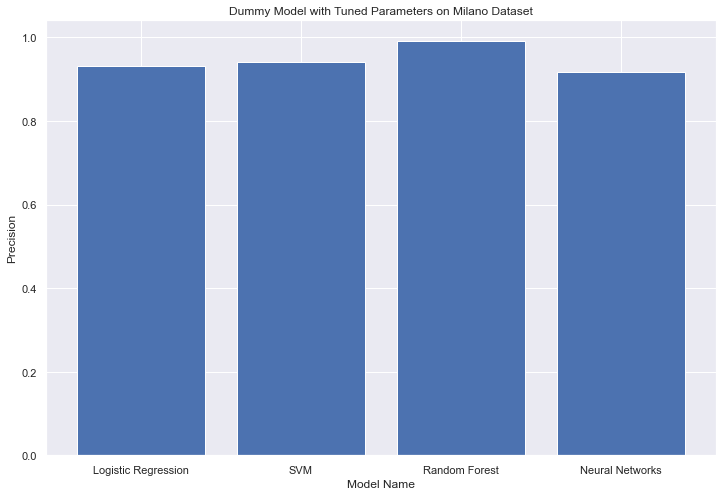

In [34]:
best_estimators = {
    "Logistic Regression": grid_LR.best_estimator_,
    "SVM": grid_SVM.best_estimator_,
    "Random Forest": grid_RF.best_estimator_,
    "Neural Networks": grid_NN.best_estimator_
}
new_precisions = []
for name in best_estimators:
    estimator = best_estimators[name]
    y_pred = estimator.predict(X_test)
    new_precisions.append(precision_score(y_test, y_pred, average="macro"))
    
plt.figure(figsize=(12, 8))
plt.bar([name for name in best_estimators], new_precisions)
plt.title("Dummy Model with Tuned Parameters on Milano Dataset")
plt.xlabel("Model Name")
plt.ylabel("Precision")
plt.show()

### 2.3.3 Performance Report
The tuned Random Forest has the best performance.